# Randomforest

## Regresión

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import seaborn as sns

dataset = fetch_california_housing()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target)
X.shape, y.shape

((20640, 8), (20640,))

In [4]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     train_size=0.8, 
                                                     random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

/home/infinitemonkeys/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((16512, 8), (16512,), (4128, 8), (4128,))

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

rf_reg = RandomForestRegressor(n_estimators=10, 
                               max_features=0.8)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
X_train.shape

(16512, 8)

In [9]:
hyperparams_grid = {'n_estimators': randint(10, 500),
                    'max_features': np.arange(3, 9)}
rs_cv = RandomizedSearchCV(rf_reg,
                           hyperparams_grid,
                           n_iter=10,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-2,
                           cv=3,
                           random_state=0)

rs_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-2,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1fe5e72cf8>, 'max_features': array([3, 4, 5, 6, 7, 8])},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [10]:
rs_cv.best_params_

{'max_features': 3, 'n_estimators': 98}

In [12]:
rs_cv.best_score_

-0.3324163014450592

In [14]:
y_test_pred = rs_cv.best_estimator_.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

mae(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred)

(0.3246653084670288, 0.23826327710392856)

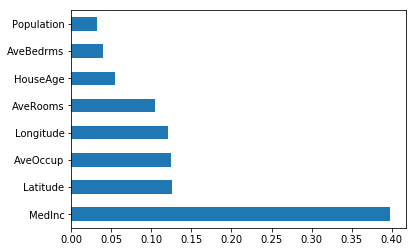

In [18]:
var_imp_series = pd.Series(rs_cv.best_estimator_.feature_importances_, 
                           index=X_train.columns)
var_imp_series.sort_values(ascending=False, inplace=True)
var_imp_series.plot.barh();

## Clasificación

In [19]:
from sklearn.ensemble import RandomForestClassifier

# .predict_proba()[:, 1]